# **Final Project EDA**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

# Load the Coffee Dataset

In [5]:
coffee_dataframe = pd.read_csv('df_arabica_clean.csv')

In [6]:
coffee_dataframe.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


# Cleaning the Data

In [7]:
columns_to_drop = ['Grading Date','Owner', 'Region','Certification Body', 'Number of Bags', 'Bag Weight', 'Unnamed: 0', 'ID', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number', 'Company', 'Producer', 'In-Country Partner', 'Status', 'Certification Address', 'Certification Contact', 'Defects', 'Uniformity', 'Clean Cup', 'Sweetness']

coffee_dataframe.drop(columns_to_drop, axis=1, inplace = True)

coffee_dataframe.head(1)

,Country of Origin,Altitude,Harvest Year,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration
0,Colombia,1700-1930,2021 / 2022,Castillo,Double Anaerobic Washed,8.58,8.5,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023"


In [8]:
coffee_dataframe.dropna(inplace=True)
coffee_dataframe.reset_index(drop=True, inplace=True)

len(coffee_dataframe.index)

197

# Data Exploration

In [9]:
coffee_dataframe[coffee_dataframe['Aroma'] >= 8.3]['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Guatemala'], dtype=object)

In [10]:
coffee_dataframe[coffee_dataframe['Flavor'] <= 8.5]['Country of Origin'].unique()



array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Peru', 'Brazil',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Indonesia', 'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

<Axes: xlabel='Harvest Year', ylabel='Acidity'>

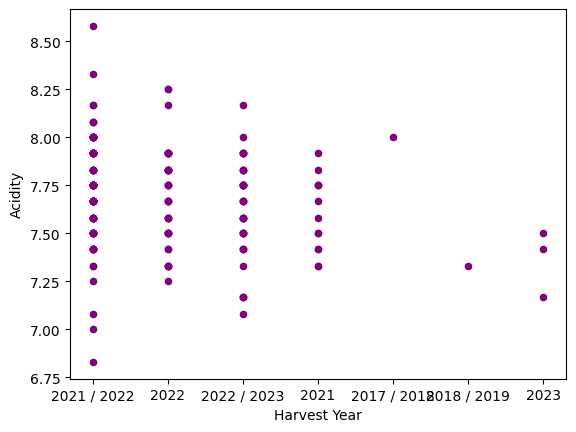

In [11]:
coffee_dataframe.plot.scatter(x='Harvest Year', y = 'Acidity', c = 'Purple')


# Visualizations

How is the number of quakers related to the color of a cofee?

In [12]:
numerical_coffee_df = coffee_dataframe[['Aroma', 'Flavor', 'Aftertaste' , 'Acidity',]]
fig = px.scatter_matrix(numerical_coffee_df)
fig.show()

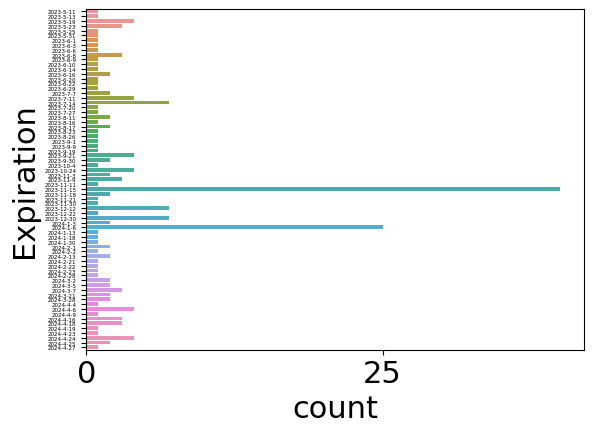

In [16]:
# Region and expiration date countplot

coffee_dataframe['Expiration'] = coffee_dataframe['Expiration'].apply(
  lambda x: pd.to_datetime(x))
coffee_dataframe.sort_values(by=['Expiration'], inplace=True)
coffee_dataframe['Expiration'] = coffee_dataframe['Expiration'].apply(
  lambda d: str(d.year) + '-' + str(d.month) + '-' + str(d.day))



ax = sns.countplot(y="Expiration", data=coffee_dataframe)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=4)
plt.tight_layout()
plt.rcParams.update({'font.size': 50})
plt.show()




<ipython-input-14-a72e14297d88>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



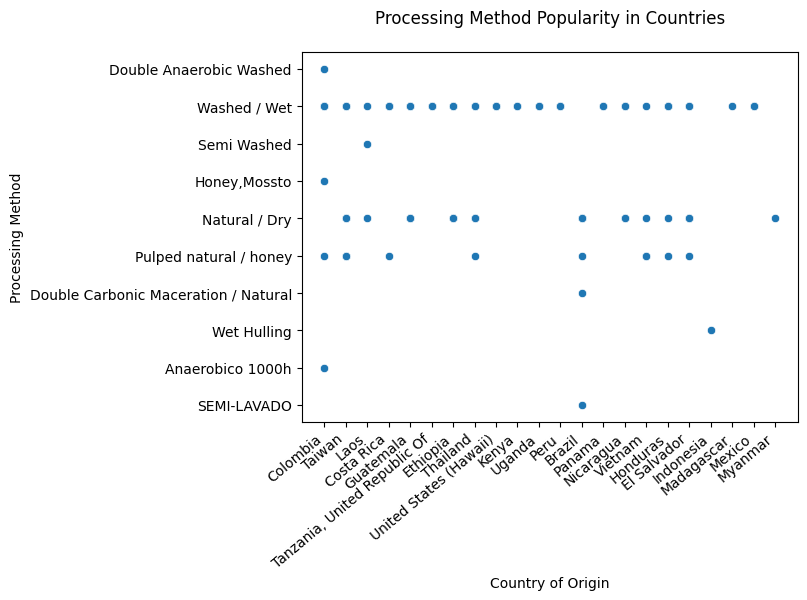

In [14]:
# Processing method and country of origin to see which processing methods are popular in which countries

ax=sns.scatterplot(
    data=coffee_dataframe,
    x="Country of Origin", y="Processing Method",
)
plt.title('Processing Method Popularity in Countries\n')

ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [15]:
date = 'March 23rd, 2004'

print(pd.to_datetime(date))

2004-03-23 00:00:00
